In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets._samples_generator import make_blobs

In [2]:
random_seed = 42
np.random.seed(random_seed)

In [3]:
class Sigmoid:
    def __init__(self, alpha:float=1.0) -> None:
        self.alpha = alpha
        
    def __call__(self, x):
        return 1/(1+np.exp(-self.alpha*x))
    
    def __repr__(self) -> str:
        return f"Sigmoid(alpha={self.alpha})"
    
    def forward(self, x):
        return 1/(1+np.exp(-self.alpha*x))
    
    def backward(self, x):
        return x*(1-x)*self.alpha

In [4]:
class L2:
    def __call__(self, y, y_pred):
        return self.foward(y, y_pred)

    def __repr__(self) -> str:
        return "MSE"
    
    def foward(self, y, y_pred):
        return (y_pred-y) ** 2
    
    def backward(self, y, y_pred):
        return 2* (y_pred-y)

In [5]:
class Layer:
    def __init__(self, input_size:int, output_size:int) -> None:
        self.w = np.random.randn(input_size, output_size) * np.sqrt(1/(input_size+output_size))
        self.b = np.random.randn(output_size).reshape(1, -1)
    
    def __call__(self, input) -> np.ndarray:
        return np.dot(input, self.w) + self.b
    
    def __repr__(self) -> str:
        return f"Layer({self.w.shape[0]}, {self.w.shape[1]})"
    
    def forward(self, input) -> np.ndarray:
        return np.dot(input, self.w) + self.b
    

In [6]:
class MLP:
    def __init__(self, lr:float, layers:list, act_functions:list) -> None:
        self.lr = lr
        self.layers = layers
        self.act_functions = act_functions if len(act_functions) == len(layers) else [Sigmoid() for _ in range(len(layers))]
    
    def __call__(self, x):
        return self.__foward__(x, train=False)
    
    def __repr__(self) -> str:
        params = {
            'lr': self.lr,
            'layers': self.layers,
            'act_functions': self.act_functions
        }
        return f"MLP({params})"
    
    def __foward__(self, x, train:bool=True):
        self.outputs = [x]
        for layer, act_function in zip(self.layers, self.act_functions):
            x = act_function(layer(x))
            if train:
                self.outputs.append(x)
        return x
    
    def __backward__(self, y):
        
        for layer in reversed(range(0, len(self.layers))):
            output = self.outputs[layer + 1]
            if layer == len(self.layers)-1:
                derror = self.loss.backward(y=y, y_pred=output)
                delta = derror * self.act_functions[layer].backward(output)
            else:
                delta = self.deltas[0] @ _w.T * self.act_functions[layer].backward(output)
            
            self.deltas.insert(0, delta)
            _w = self.layers[layer].w
            
            self.layers[layer].w -= self.lr * (self.outputs[layer].T @ delta)
            self.layers[layer].b -= self.lr * np.mean(delta, axis=0, keepdims=True)
            
    def fit(self, x, y, epochs:int, loss:L2(), plot:bool=False):
        
        self.loss = loss
        data = {
            'loss': []
        }
        res:int= 50
        if plot:
            from IPython import display
            import time
        
        for epoch in range(epochs):            
            self.deltas = []
            self.outputs = []
            output = self.__foward__(x)
            loss = self.loss(y, output)
            self.__backward__(y)
            data['loss'].append(loss.mean())
            if plot:
                if epoch%10 == 0:
                    _x0 = np.linspace(-3, 3, res)
                    _x1 = np.linspace(-3, 3, res)
                    _y = np.zeros((res, res))
                    
                    for i0, x0 in enumerate(_x0):
                        for i1, x1 in enumerate(_x1):
                            _y[i0, i1] = self.predict(np.array([[x0, x1]]))
                    
                    plt.pcolormesh(_x0, _x1, _y, cmap="coolwarm")
                    plt.axis("equal")
                    
                    plt.scatter(x[y[:, 0]==0, 0], x[y[:, 0]==0, 1],cmap='skyblue')
                    plt.scatter(x[y[:, 0]==1, 0], x[y[:, 0]==1, 1],cmap='salmon')
                    
                    display.clear_output(wait=True)
                    plt.title(f"Epoch: {epoch+1}, Loss: {loss.mean()}")
                    plt.show()
                    time.sleep(0.5)
            else:
                print(f"Epoch: {epoch+1}, Loss: {loss.mean()}", end="\r")
                    
        return data
    
    def predict(self, x):
        return self.__foward__(x, train=False)
    

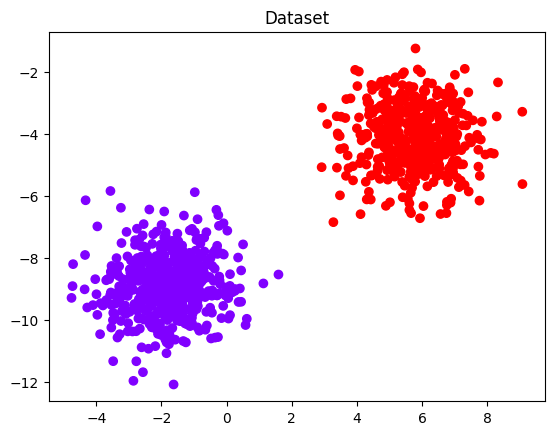

In [7]:
x, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=40, cluster_std=1)
y = y.reshape(-1, 1)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='rainbow')
plt.title('Dataset')
plt.show()

In [8]:
x = (x - x.mean(axis=0)) / x.std(axis=0)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=40, test_size=0.2,
                                                    stratify=y)

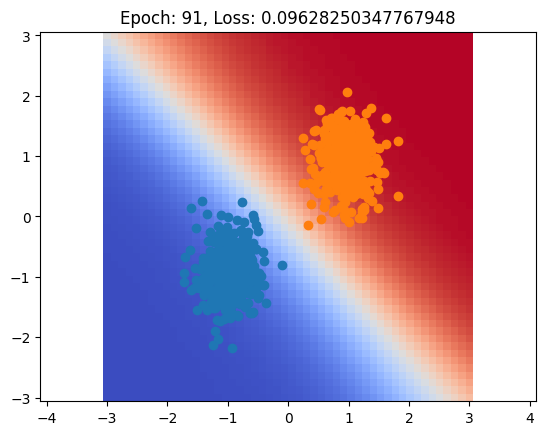

In [10]:
dense = [
    dense1:= Layer(input_size=2, output_size=2),
    dense2:= Layer(input_size=2, output_size=1),
]
model = MLP(lr=0.001, layers=dense, act_functions=[Sigmoid()])

model

history = model.fit(x_train, y_train, epochs=100, loss=L2(), plot=True)

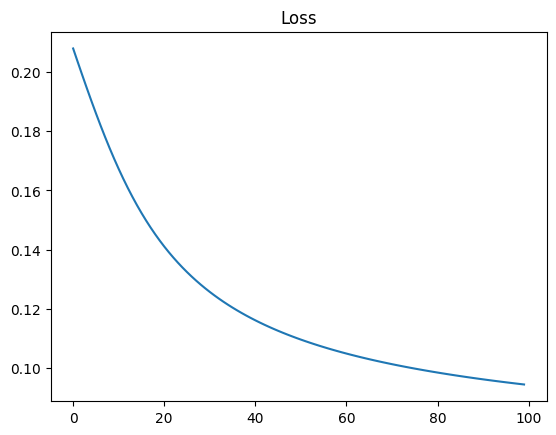

In [11]:
plt.plot(history['loss'])
plt.title('Loss')
plt.show()

In [12]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)
accuracy_score(y_test, y_pred)

0.99

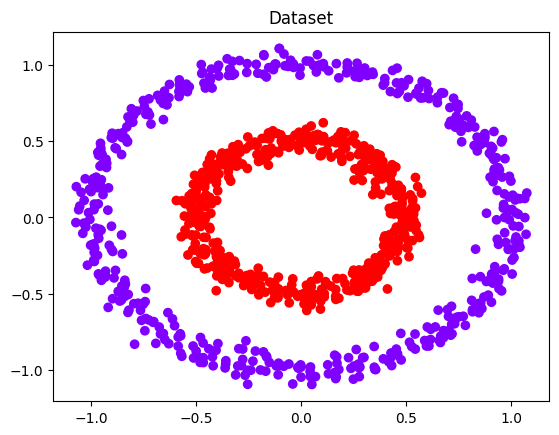

In [13]:
x, y = make_circles(n_samples=1000, noise=0.05,factor=0.5, random_state=4)
y = y.reshape(-1, 1)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='rainbow')
plt.title('Dataset')
plt.show()

In [14]:
x = (x - x.mean(axis=0)) / x.std(axis=0)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=40, test_size=0.2,
                                                    stratify=y)

In [16]:
class Tanh:
    def __init__(self, alpha:float=1.0) -> None:
        self.alpha = alpha
    def __call__(self, x):
        return np.tanh(self.alpha*x)
    def __repr__(self) -> str:
        return f"Tanh(alpha={self.alpha})"
    def forward(self, x):
        return np.tanh(self.alpha*x)
    def backward(self, x):
        return self.alpha*(1-x**2)

In [36]:
dense = [
    Layer(input_size=2, output_size=4),
    Layer(input_size=4, output_size=1),
]
model = MLP(lr=0.001, layers=dense, act_functions=[Tanh(), Sigmoid()])

model

MLP({'lr': 0.001, 'layers': [Layer(2, 4), Layer(4, 1)], 'act_functions': [Tanh(alpha=1.0), Sigmoid(alpha=1.0)]})

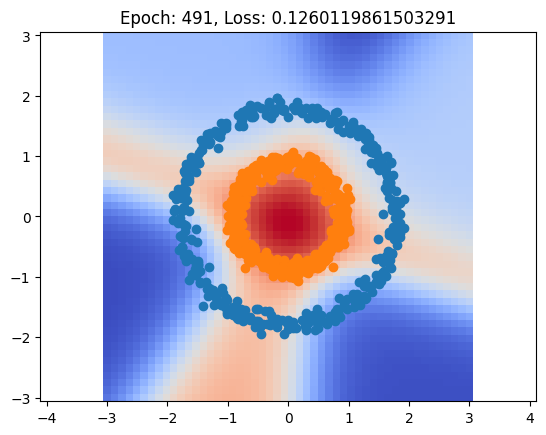

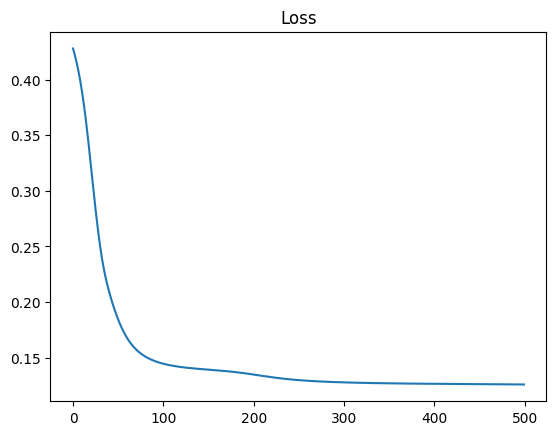

In [37]:
history = model.fit(x_train, y_train, epochs=500, loss=L2(), plot=True)
plt.plot(history['loss'])
plt.title('Loss')
plt.show()

In [38]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)
accuracy_score(y_test, y_pred)

0.89